In [1]:
# link for more projects
#https://www.projectpro.io/article/marketing-analytics-project-ideas/591
#There is issue in dataset download , download it when internet is very nice.


# This project is inspired from henry's article at medium
- "E-commerce and Retail Data Analytics Projects You Should Put in Your Resume (with Business Insights)"

# This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

## Dataset Characteristics

Multivariate, Sequential, Time-Series

## Subject Area
Business

## Associated Tasks
Classification, Clustering

## Feature Type
Integer, Real

## Instances
541909

## Features
6

# Variables Table
Variable Name	Role	Type	Description	Units	Missing Values
- InvoiceNo	ID	Categorical	a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation		no
- StockCode	ID	Categorical	a 5-digit integral number uniquely assigned to each distinct product		no
- Description	Feature	Categorical	product name		no
- Quantity	Feature	Integer	the quantities of each product (item) per transaction		no
- InvoiceDate	Feature	Date	the day and time when each transaction was generated		no
- UnitPrice	Feature	Continuous	product price per unit	no
- CustomerID	Feature	Categorical	a 5-digit integral number uniquely assigned to each customer		no
- Country	Feature	Categorical	the name of the country where each customer resides		no

Note: The UnitPrice is in Sterlings

In [2]:
#  import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_excel('dataset.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Data Cleaning and Understanding
data.isnull().sum()
data['CustomerID'].fillna('Unknown-ID',inplace=True)
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [6]:
data['Description'].fillna("No description provided", inplace=True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# Checking each column separately
data['Quantity'].describe()
# if the quantity is, for example, -5, It means that five units of that specific item were returned or canceled in one single transaction.
# negative sign shows that item is returned or cancelled

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [9]:
data[data['Quantity']<0]   # C in beginning of InvoiceNO column means order was cancelled.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [10]:
data['UnitPrice'].info()
data['UnitPrice'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: UnitPrice
Non-Null Count   Dtype  
--------------   -----  
541909 non-null  float64
dtypes: float64(1)
memory usage: 4.1 MB


count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [11]:
data[data['UnitPrice']<0]
# what "negative sign in unit price" column means and what "adjust bad debt" means in description column
# The company provided a good or service (made a sale) and expected to receive money.
# The customer failed to pay (the debt turned "bad").
# The company is now using the "Adjust bad debt" entry with a negative unit price to formally cancel out that expected income and mark it as a loss on their books to company.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,Unknown-ID,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,Unknown-ID,United Kingdom


In [12]:
data['Country'].value_counts()
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [13]:
data['InvoiceDate'].dtype

dtype('<M8[ns]')

In [14]:
# creating two columns of date and time from inoviceDate column
data['InvoiceTime']=data['InvoiceDate'].dt.time
data['InvoiceDateOnly']=data['InvoiceDate'].dt.date
data['InvoiceTime'].min()
data['InvoiceDateOnly'].head()

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: InvoiceDateOnly, dtype: object

In [15]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceTime', 'InvoiceDateOnly'],
      dtype='object')

In [16]:
data['StockCode'].nunique()
#data['Description'].nunique()

4070

In [17]:
# Creating new column of total price
data['Total Price']=data['Quantity']*data['UnitPrice']
data['Total Price'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Total Price, dtype: float64

In [18]:
data['StockCode'].nunique()
data[data['StockCode']==71053]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTime,InvoiceDateOnly,Total Price
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,2010-12-01,20.34
50,536373,71053,WHITE METAL LANTERN,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom,09:02:00,2010-12-01,20.34
67,536375,71053,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom,09:32:00,2010-12-01,20.34
279,536396,71053,WHITE METAL LANTERN,6,2010-12-01 10:51:00,3.39,17850.0,United Kingdom,10:51:00,2010-12-01,20.34
417,536406,71053,WHITE METAL LANTERN,8,2010-12-01 11:33:00,3.39,17850.0,United Kingdom,11:33:00,2010-12-01,27.12
...,...,...,...,...,...,...,...,...,...,...,...
534544,581149,71053,WHITE MOROCCAN METAL LANTERN,1,2011-12-07 14:12:00,3.75,15471.0,United Kingdom,14:12:00,2011-12-07,3.75
534545,581149,71053,WHITE MOROCCAN METAL LANTERN,1,2011-12-07 14:12:00,3.75,15471.0,United Kingdom,14:12:00,2011-12-07,3.75
536736,581219,71053,WHITE MOROCCAN METAL LANTERN,1,2011-12-08 09:28:00,8.29,Unknown-ID,United Kingdom,09:28:00,2011-12-08,8.29
539298,581439,71053,WHITE MOROCCAN METAL LANTERN,1,2011-12-08 16:30:00,8.29,Unknown-ID,United Kingdom,16:30:00,2011-12-08,8.29


In [19]:
data.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
InvoiceTime        0
InvoiceDateOnly    0
Total Price        0
dtype: int64

In [20]:
data[(data['Quantity']<0) & (data['UnitPrice']<0)]
# as both quantity and unit price are not negative in same row so if total price has negative values it means that order was cancelled and company had to bear loss of that amount.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTime,InvoiceDateOnly,Total Price


In [21]:
# Handling cases where unit price or quantity is zero
# 1. Create a mask for the rows you want to KEEP (the negation of the rows you want to drop)
condition_to_drop = (data['UnitPrice'] == 0) & (data['Quantity'] < 0)

# 2. Use the negation operator (~) to select all rows that do NOT meet the condition.
data = data[~condition_to_drop]

# UnitPrice=0 refers that Items given as a bonus, a marketing promotion, or a gift to a customer (e.g., "Buy one, get one free," or a free sample). The quantity for these items is usually positive.
data[data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTime,InvoiceDateOnly,Total Price
622,536414,22139,No description provided,56,2010-12-01 11:52:00,0.0,Unknown-ID,United Kingdom,11:52:00,2010-12-01,0.0
1970,536545,21134,No description provided,1,2010-12-01 14:32:00,0.0,Unknown-ID,United Kingdom,14:32:00,2010-12-01,0.0
1971,536546,22145,No description provided,1,2010-12-01 14:33:00,0.0,Unknown-ID,United Kingdom,14:33:00,2010-12-01,0.0
1972,536547,37509,No description provided,1,2010-12-01 14:33:00,0.0,Unknown-ID,United Kingdom,14:33:00,2010-12-01,0.0
1987,536549,85226A,No description provided,1,2010-12-01 14:34:00,0.0,Unknown-ID,United Kingdom,14:34:00,2010-12-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,Unknown-ID,United Kingdom,18:36:00,2011-12-07,0.0
536981,581234,72817,No description provided,27,2011-12-08 10:33:00,0.0,Unknown-ID,United Kingdom,10:33:00,2011-12-08,0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,Unknown-ID,United Kingdom,13:58:00,2011-12-08,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,Unknown-ID,United Kingdom,13:58:00,2011-12-08,0.0


# Time to get Insights



# 

# Analysis and Visualizations

In [22]:
# Total Revenue for the entire 2010-2011(from december 2010-november 2011) period and month-over-month revenue trend
Total_revenue=data['Total Price'].sum()
Total_revenue

# This creates a series like '2010-12', '2011-01', '2011-02', etc.
month_period = data['InvoiceDate'].dt.to_period('M') 

# Grouping by this period gives you the true month-over-month trend
month_over_month_revenue = data.groupby(month_period)['Total Price'].sum()
month_over_month_revenue.values

array([ 748957.02 ,  560000.26 ,  498062.65 ,  683267.08 ,  493207.121,
        723333.51 ,  691123.12 ,  681300.111,  682680.51 , 1019687.622,
       1070704.67 , 1461756.25 ,  433668.01 ])

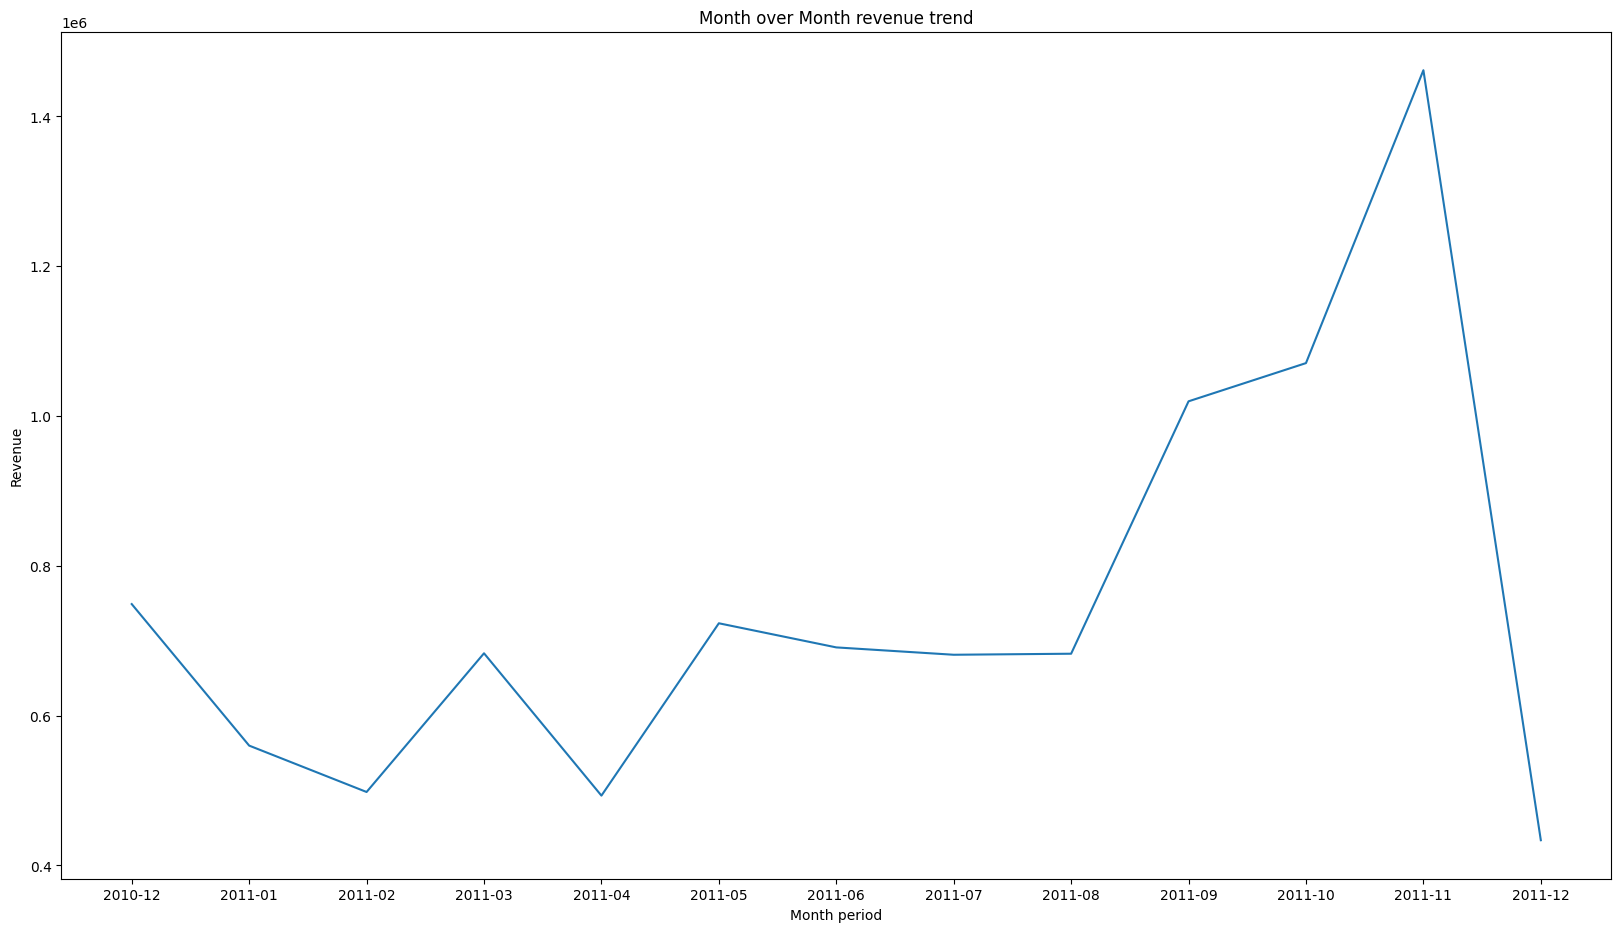

In [23]:
# Visualization of month over month trend
plt.figure(figsize=(20,11))
plt.title("Month over Month revenue trend")
plt.xlabel("Month period")
plt.ylabel('Revenue')
plt.plot(month_over_month_revenue.index.astype(str),month_over_month_revenue.values)
plt.show()

In [24]:
# Why the sales are less in last month of 2011 is it because complete month data is not collected
# Converting in datatime datatype
data['InvoiceDateOnly']=pd.to_datetime(data['InvoiceDateOnly'])

# Filtering for month 12
december_data_2011=data[(data['InvoiceDateOnly'].dt.month==12) & (data['InvoiceDateOnly'].dt.year==2011)]
december_data_2011

# the reason of low sales in december 2011 is limited data collection, as only nine days data of this month is collected.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTime,InvoiceDateOnly,Total Price
516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,2011-12-01 08:12:00,4.15,13853.0,United Kingdom,08:12:00,2011-12-01,-33.20
516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,2011-12-01 08:14:00,1.25,15197.0,United Kingdom,08:14:00,2011-12-01,-1.25
516386,C579890,23374,RED SPOT PAPER GIFT BAG,-1,2011-12-01 08:14:00,0.82,15197.0,United Kingdom,08:14:00,2011-12-01,-0.82
516387,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,2011-12-01 08:14:00,0.85,15197.0,United Kingdom,08:14:00,2011-12-01,-1.70
516388,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,2011-12-01 08:18:00,25.00,13644.0,United Kingdom,08:18:00,2011-12-01,-25.00
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12:50:00,2011-12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12:50:00,2011-12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,2011-12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12:50:00,2011-12-09,16.60


In [25]:
# Finding the correlatin between unit price and quantity column
correlation=data['Quantity'].corr(data['UnitPrice'])
correlation

np.float64(-0.0013367315292160409)

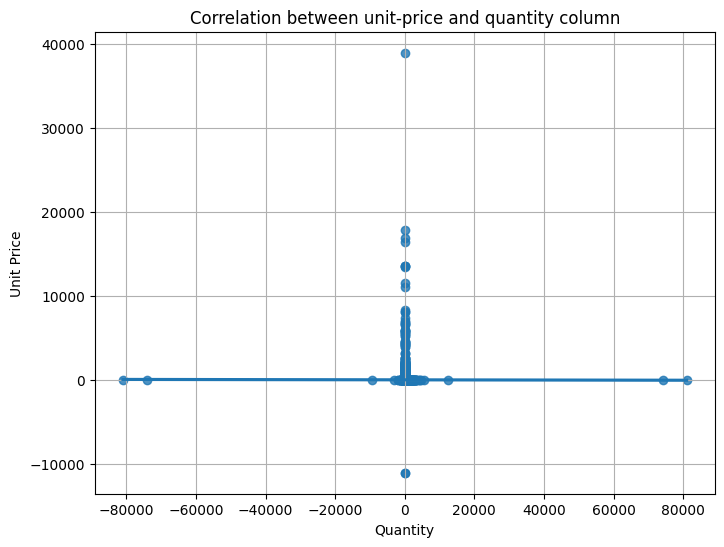

In [26]:
#  ploting the correlation between the unit price and quantity column
plt.figure(figsize=(8,6))
sns.regplot(x=data['Quantity'],y=data['UnitPrice'],data=data)
plt.title("Correlation between unit-price and quantity column")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.grid(True)
plt.show()


# No Linear Relationship: The Unit Price and the Quantity sold are linearly independent.
# If there were a relationship where increasing price caused decreasing quantity, 
# the correlation would need to be a substantial negative number (e.g., $-0.5$ or less).

# Rejecting the Hypothesis: The data does not support the hypothesis that 
# "increasing unit price values are the reason of buying in less quantity."
#  If that were true, the graph would show a clear downward slope.

# As there is no relationship between two columns so we cannot say that "Products with high unit price are sold in low quantity"

In [27]:
# Top most returning countries based on the quantity
returning_quantity=data[data['Quantity']<0][['Quantity','Country']]
country_returning=returning_quantity.groupby('Country')['Quantity'].sum()
top_10_returning_countries=country_returning.sort_values(ascending=True).head(10)
top_10_returning_countries=top_10_returning_countries.abs()
top_10_returning_countries.values

array([263033,   4810,   1815,   1624,   1424,   1127,    809,    798,
          556,    446])

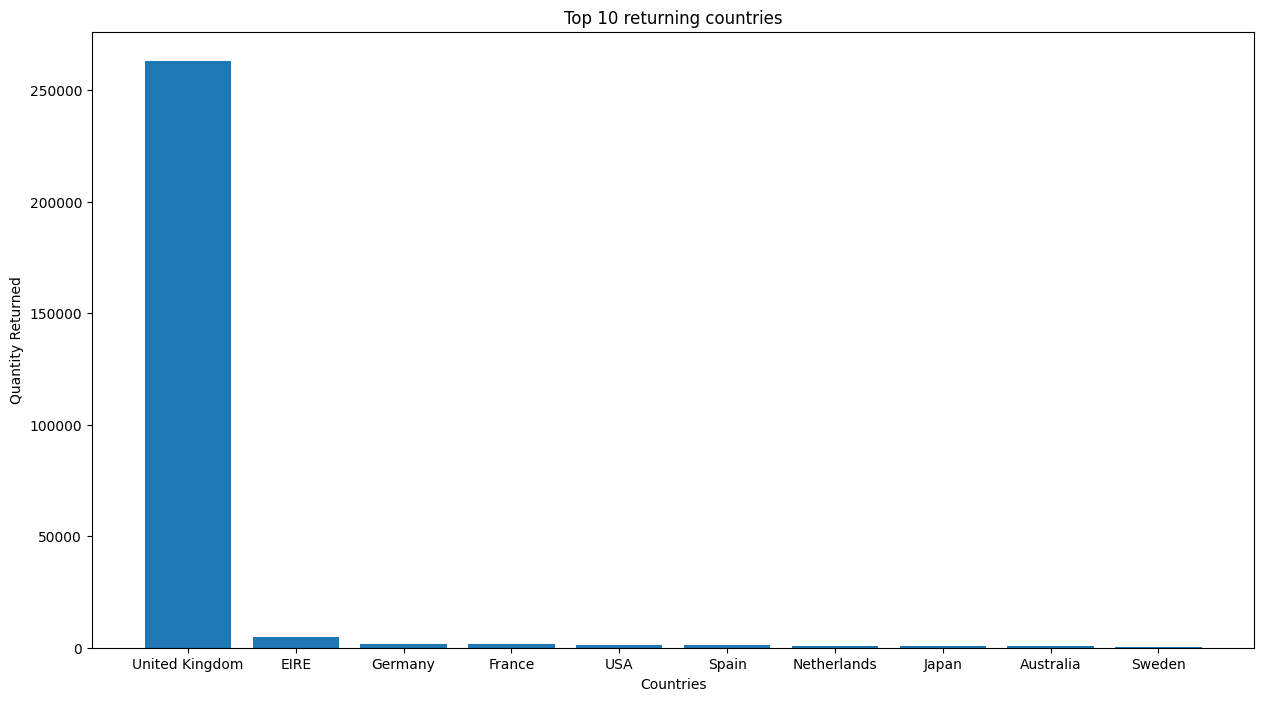

In [28]:
# visulization of top 10 returning countries
plt.figure(figsize=(15,8))
plt.title("Top 10 returning countries")
plt.xlabel("Countries")
plt.ylabel("Quantity Returned")
plt.bar(x=top_10_returning_countries.index, height=top_10_returning_countries.values, data=data)
plt.show()

# Top 5 countries with respect to order quantity and total revenue are same.

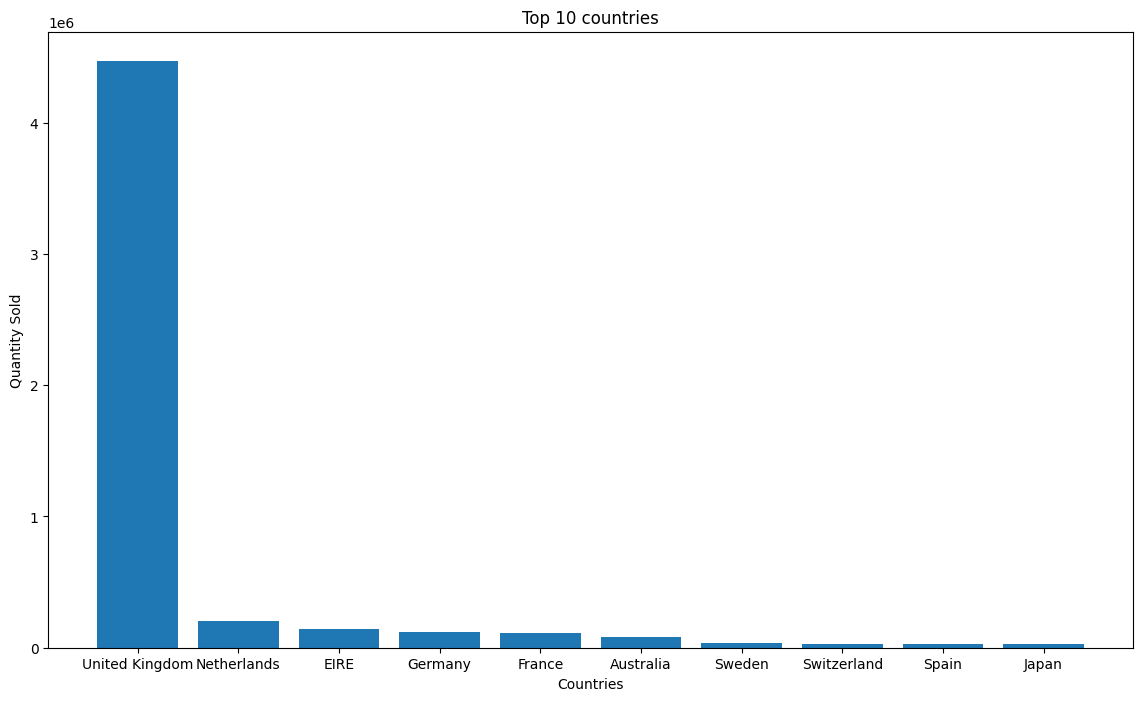

In [29]:
# Top 10 countries with respect to quantity sold
Top_10_countries=data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualization of top 10 countries
plt.figure(figsize=(14,8))
plt.title("Top 10 countries")
plt.xlabel("Countries")
plt.ylabel("Quantity Sold")
plt.bar(x=Top_10_countries.index, height=Top_10_countries.values, data=data)
plt.show()

# United kingdom has both high sales and returns
# EIRE has second largest sales and third based on returns
# Netherlands situation is dangerous as it is 7th w.r.t total transactions but on second w.r.t to returns.
# USA has satisfying situation as it is fifth w.r.t total transactions but not in top 10th w.r.t returns.

In [30]:
# What is total order quantity in top 10 countries and how much percent it becomes of total quantity of all countries(38 in number)
total_quantity=data['Quantity'].sum()
top_10_countries_quantity=Top_10_countries.values.sum()
percent_of_top_countries=(top_10_countries_quantity/total_quantity)*100
print(f"Top 10 countries has total {percent_of_top_countries} percent of total quantity sold")

# The store should mostly focus on top 10 as 97.4% of total quantity is order from that countries. 

Top 10 countries has total 97.39438240504573 percent of total quantity sold


In [31]:
# Top 3 selling products in top 10 countries w.r.t quantity?
filtered_products = data[data['Country'].isin(Top_10_countries.index)]
filtered_products = filtered_products[~(filtered_products['Description'] == 'No description provided')]

# 3. Group by Country and Product, then sum the total quantity
country_product_sales = filtered_products.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()
country_product_sales.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)

# 4. Find the Top 3 products for EACH country
# We group by 'Country' again and apply a function to find the 3 largest quantities
top_3_products_per_country = country_product_sales.groupby('Country').apply(
    # 'x' here represents the DataFrame slice for a single country
    lambda x: x.nlargest(3, 'TotalQuantity')
).reset_index(drop=True)

top_3_products_per_country

,Country,Description,TotalQuantity
0,Australia,MINI PAINT SET VINTAGE,2916
1,Australia,RABBIT NIGHT LIGHT,1884
2,Australia,RED HARMONICA IN BOX,1704
3,EIRE,PACK OF 72 RETROSPOT CAKE CASES,1728
4,EIRE,60 TEATIME FAIRY CAKE CASES,1536
5,EIRE,VINTAGE SNAP CARDS,1492
6,France,RABBIT NIGHT LIGHT,4023
7,France,MINI PAINT SET VINTAGE,2196
8,France,RED TOADSTOOL LED NIGHT LIGHT,1314
9,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1218


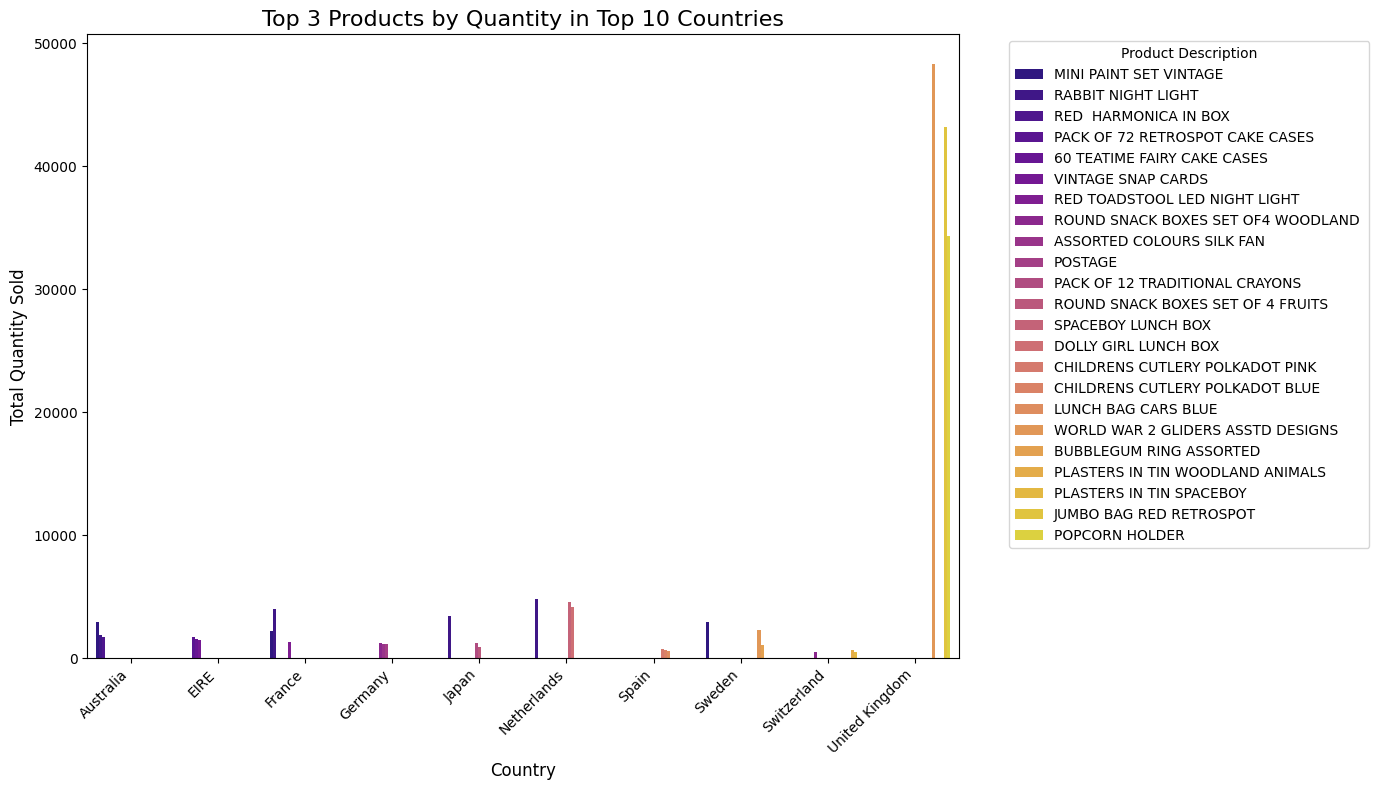

In [32]:
plt.figure(figsize=(14, 8))

# Create the grouped bar chart
sns.barplot(
    x='Country',
    y='TotalQuantity',
    hue='Description', # This groups the bars by product description
    data=top_3_products_per_country,
    palette='plasma'
)

plt.title('Top 3 Products by Quantity in Top 10 Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate country names for readability
plt.legend(title='Product Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [33]:
# Top 10 customers based on quantity they buy?
Top_10_customers=data.groupby("CustomerID")['Quantity'].sum()
Top_10_customers=Top_10_customers[~(Top_10_customers.index=='Unknown-ID')]
Top_10_customers=Top_10_customers.sort_values(ascending=False).head(10)
Top_10_customers.index

Index([14646.0, 12415.0, 14911.0, 17450.0, 18102.0, 17511.0, 13694.0, 14298.0,
       14156.0, 16684.0],
      dtype='object', name='CustomerID')

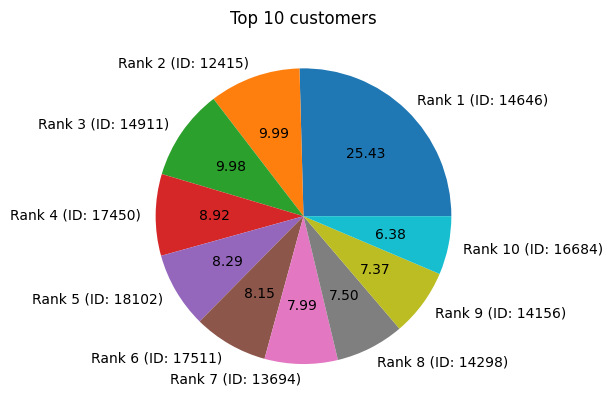

In [58]:
# Visualization of top 10 customers
# Create a list of the cleaned Customer IDs (e.g., 14646 instead of 14646.0)
cleaned_ids = [str(int(id)) for id in Top_10_customers.index]

# The rank is based on the current order of the Top_10_customers object
ranked_labels = [f"Rank {i+1} (ID: {cid})" for i, cid in enumerate(cleaned_ids)] #Create a list of rank labels (e.g., 'Rank 1 (ID: 14646)')
plt.pie(x=Top_10_customers.values, labels=ranked_labels, autopct='%.2f')
plt.title("Top 10 customers")
plt.show()

In [35]:
# Top most returning customers based on the quantity
customer_returning_quantity=data[data['Quantity']<0][['Quantity','CustomerID']]
customer_returning=customer_returning_quantity.groupby('CustomerID')['Quantity'].sum()
customer_returning=customer_returning[~(customer_returning.index=='Unknown-ID')]
top_10_returning_customers=customer_returning.sort_values(ascending=True).head(10)
top_10_returning_customers=top_10_returning_customers.abs()
top_10_returning_customers.values

array([80995, 74215,  9361,  9014,  8060,  4627,  3768,  3335,  2975,
        2160])

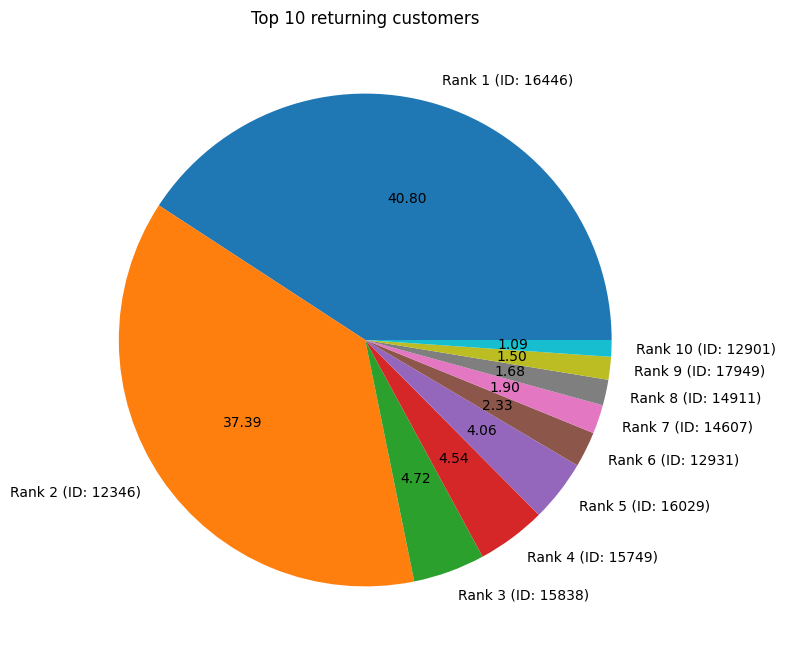

In [59]:
# visulization of top 10 returning customers
plt.figure(figsize=(15,8))
plt.title("Top 10 returning customers")
# Create a list of the cleaned Customer IDs (e.g., 14646 instead of 14646.0)
cleaned_ids = [str(int(id)) for id in top_10_returning_customers.index]

# The rank is based on the current order of the Top_10_customers object
ranked_labels = [f"Rank {i+1} (ID: {cid})" for i, cid in enumerate(cleaned_ids)] #Create a list of rank labels (e.g., 'Rank 1 (ID: 14646)')
plt.pie(x=top_10_returning_customers.values, labels=ranked_labels, data=data,autopct='%.2f')
plt.show()

# Customers who buy in large quantity are not the customers who return large quantity.



In [37]:
# Month sales w.r.t count of invoice no
months=data['InvoiceDate'].dt.month
each_month_sale=data.groupby(months)['InvoiceNo'].count()
each_month_sale

InvoiceDate
1     35051
2     27659
3     36614
4     29730
5     36913
6     36767
7     39401
8     35234
9     50128
10    60596
11    84574
12    67906
Name: InvoiceNo, dtype: int64

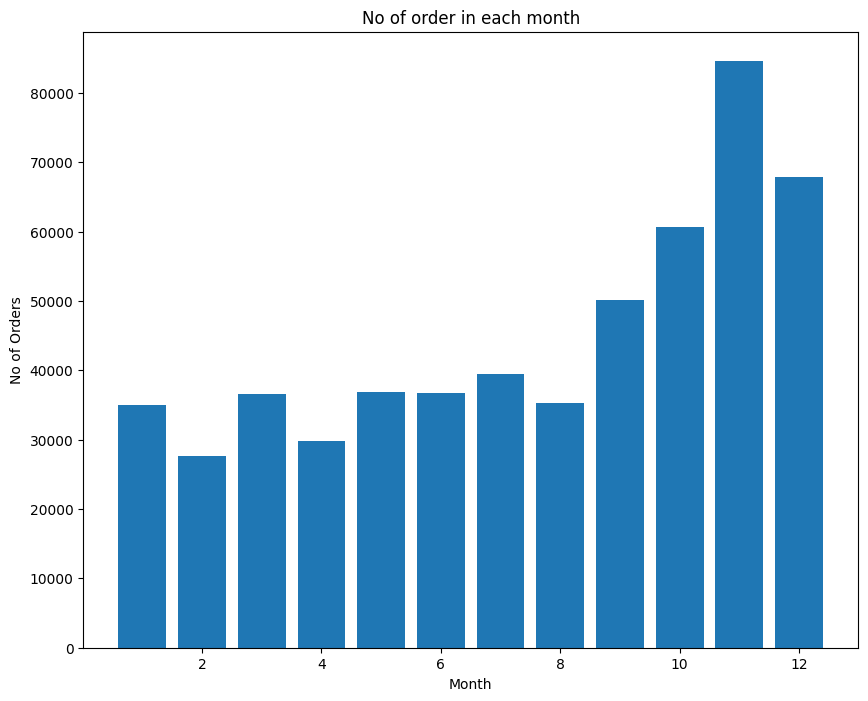

In [38]:
# Showing each month sale
plt.figure(figsize=(10,8))
plt.title("No of order in each month")
plt.xlabel("Month")
plt.ylabel("No of Orders")
plt.bar(x=each_month_sale.index, height=each_month_sale.values, data=data)
plt.show()

#  November has highest number of sells while the february has lowest orders
# High sales in November are driven by the holiday season, including major shopping events like Black Friday 
# and the lead-up to Christmas, which boosts consumer spending on gifts and related items. 
# Low sales in February are due to the post-holiday lull, where consumers have spent heavily and are financially recovering, 

In [39]:
# Each month quantity sell of top 10 countries?
filtered_dataset=data[data['Country'].isin(Top_10_countries.index)]
monthly_sales=filtered_dataset.groupby(['Country',months])['Quantity'].sum().reset_index()
monthly_sales.columns=['Country','Month','Quantity Sold']
monthly_sales

,Country,Month,Quantity Sold
0,Australia,1,5644
1,Australia,2,8659
2,Australia,3,10329
3,Australia,4,117
4,Australia,5,9073
...,...,...,...
115,United Kingdom,8,326275
116,United Kingdom,9,476660
117,United Kingdom,10,489284
118,United Kingdom,11,660972


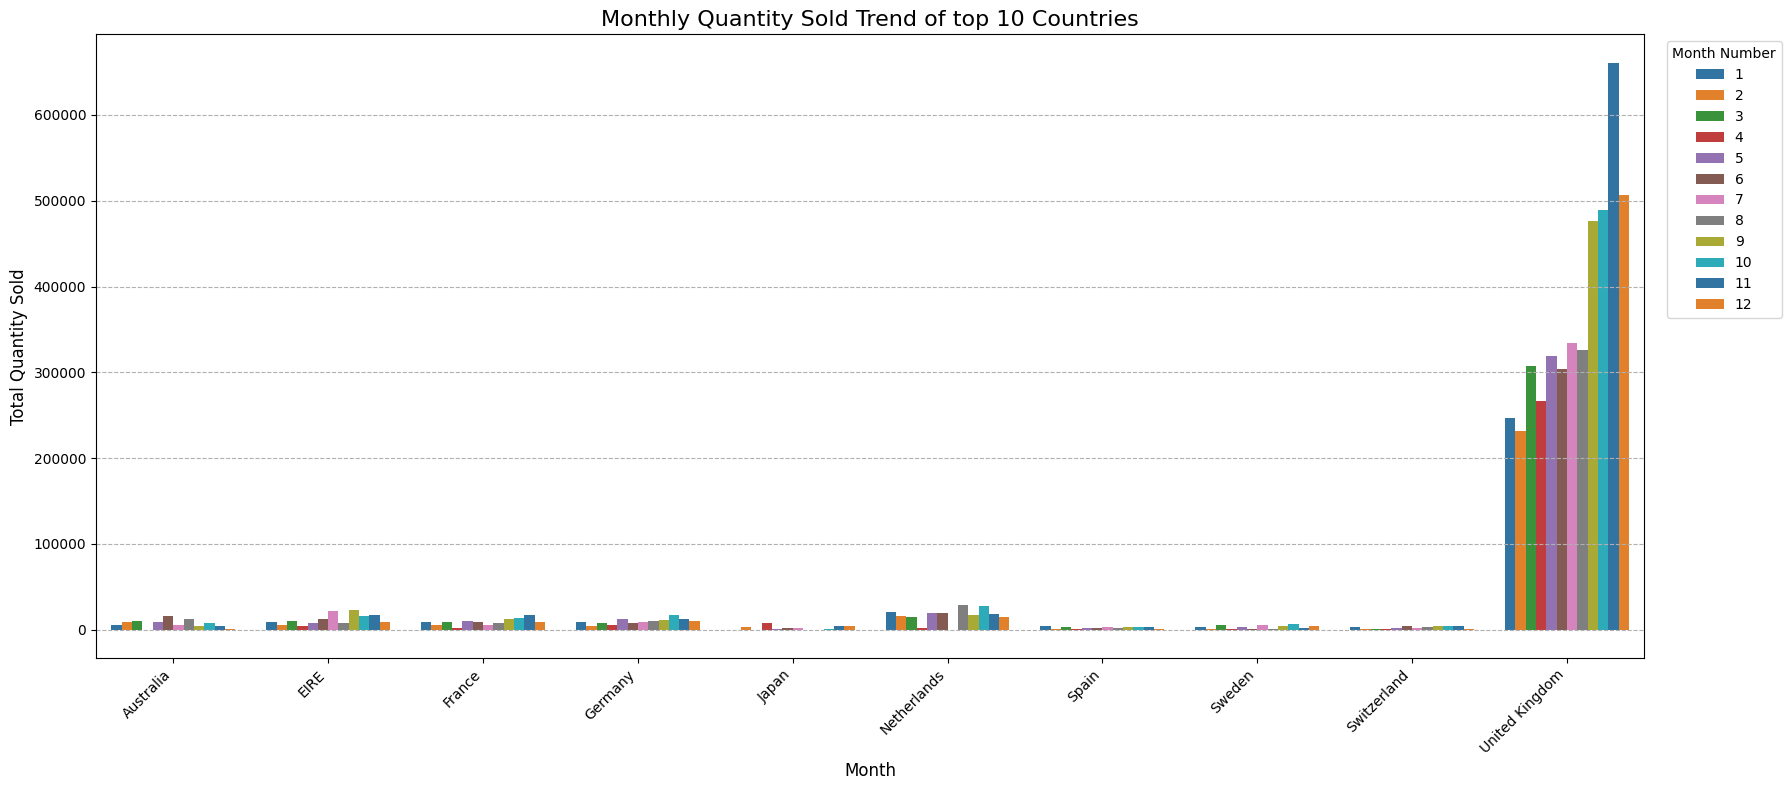

<Figure size 640x480 with 0 Axes>

In [54]:
import calendar

# --- Data Preparation (Crucial for clear labels) ---
# 1. Assuming your month column is an integer (1-12), 
#    we convert it to a readable month name/abbreviation.
#    You must create this column first:
# monthly_sales['Month Name'] = monthly_sales['Month'].apply(lambda x: calendar.month_abbr[x])

# 2. Define the correct chronological order for the months
month_order = [calendar.month_abbr[i] for i in range(1, 13)]

# --- Visualization ---
plt.figure(figsize=(18, 8)) # Use a wide figure size to fit 10 country groups
plt.title('Monthly Quantity Sold Trend of top 10 Countries', fontsize=16)

# Create the Grouped Bar Chart
sns.barplot(
    x='Country',        # X-axis: The country names (chronological order)
    y='Quantity Sold',          # Y-axis: The total quantity sold
    hue='Month',         # Hue: Creates separate bars for each month
    data=monthly_sales,
    palette='tab10'
)

plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate and order x-labels
plt.legend(title='Month Number', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('top_10_countries_monthly_quantity_sales.png')

In [41]:
# Top 10 selling products w.r.t quantity ordered?
Top_10_products=data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
Top_10_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
No description provided               32547
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
Name: Quantity, dtype: int64

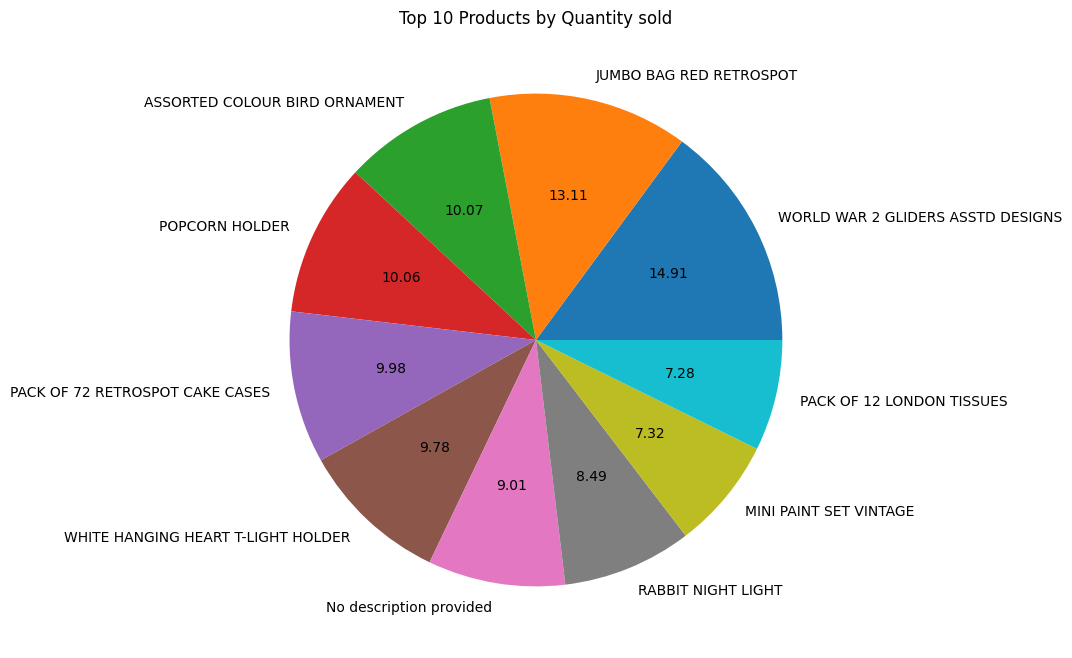

In [42]:
# Visualization of top 10 products
plt.figure(figsize=(10,8))
plt.title("Top 10 Products by Quantity sold")
plt.pie(x=Top_10_products.values, labels=Top_10_products.index, autopct="%.2f")
plt.show()

In [43]:
# Percentage contribution of the top 10 products to the total quantity sold.
total_quantity=data['Quantity'].sum()
top_10_products_totalQuantity=Top_10_products.values.sum()
top_10_products_totalQuantity
percent_topProducts_occupy=(top_10_products_totalQuantity/total_quantity)*100
print(f"Top 10 products occupy total {percent_topProducts_occupy:.2f}% of total quantity of all products")

Top 10 products occupy total 6.71% of total quantity of all products


In [44]:
# When most of the orders come afternoon, evening or night based on count of invoice No?

# Orders time range
order_start_hour=data['InvoiceDate'].dt.hour.min()
order_end_hour=data['InvoiceDate'].dt.hour.max()
total_hours_of_order=order_end_hour-order_start_hour
print(f"Total hours/timeperiod of orders is {total_hours_of_order}")

Total hours/timeperiod of orders is 14


In [45]:
# Creating new column so that we can extract which time(morning,noon or evening) had more order quantity
# Extract the hour into a new temporary column
data['Hour'] = data['InvoiceDate'].dt.hour

# --- Conditions and Choices for Linguistic Blocks ---

# 1. Morning: 6:00 to 11:59 (Hours 6, 7, 8, 9, 10, 11)
# 2. Afternoon: 12:00 to 16:59 (Hours 12, 13, 14, 15, 16)
# 3. Evening: 17:00 to 20:00 (Hours 17, 18, 19, 20)

conditions = [
    (data['Hour'] >= 6) & (data['Hour'] <= 11),  # Morning (6 AM to 11 AM)
    (data['Hour'] >= 12) & (data['Hour'] <= 16), # Afternoon (12 PM to 4 PM)
    (data['Hour'] >= 17) & (data['Hour'] <= 20)  # Evening (5 PM to 8 PM)
]

choices = [
    'Morning (6AM - 11AM)',
    'Afternoon (12PM - 4PM)',
    'Evening (5PM - 8PM)'
]

# --- Apply the Categorization ---
# np.select applies the choices based on the conditions
data['Order time'] = np.select(conditions, choices, default='Other/Undefined')

# Drop the temporary 'Hour' column
data = data.drop(columns=['Hour'])

# Display the first few rows with the new column for verification
print(data[['InvoiceDate', 'Order time']].head())


          InvoiceDate            Order time
0 2010-12-01 08:26:00  Morning (6AM - 11AM)
1 2010-12-01 08:26:00  Morning (6AM - 11AM)
2 2010-12-01 08:26:00  Morning (6AM - 11AM)
3 2010-12-01 08:26:00  Morning (6AM - 11AM)
4 2010-12-01 08:26:00  Morning (6AM - 11AM)


In [46]:
# When most orders come Morning, Afternoon or Evening based on number of orders(count of invoiceNO)
groupby_Order_time=data.groupby('Order time')['InvoiceNo'].count()
Order_time_orders=groupby_Order_time.sort_values(ascending=False)
Order_time_orders

Order time
Afternoon (12PM - 4PM)    349692
Morning (6AM - 11AM)      150020
Evening (5PM - 8PM)        40861
Name: InvoiceNo, dtype: int64

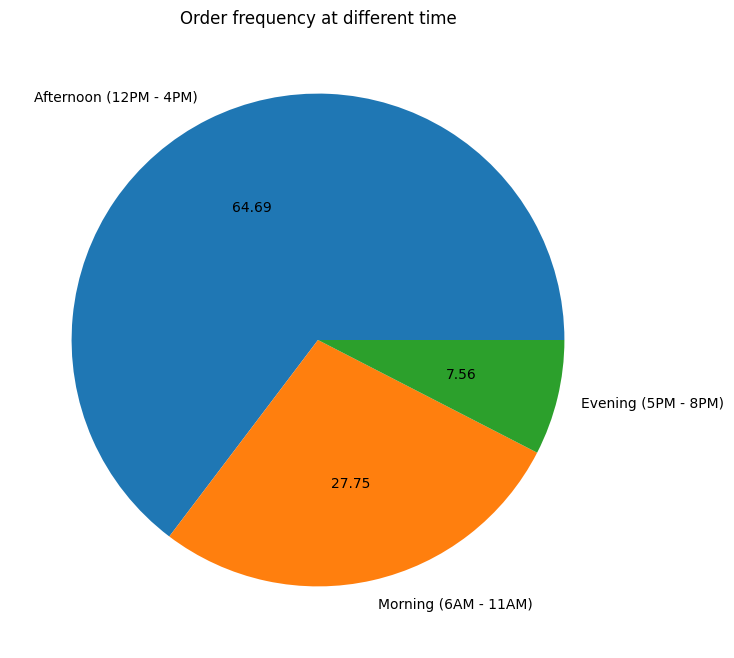

In [47]:
# Visualizing frequency of order at different times
plt.figure(figsize=(8,8))
plt.title("Order frequency at different time")
plt.pie(x=Order_time_orders.values, labels=Order_time_orders.index, autopct='%.2f')
plt.show()

In [48]:
# Calculating the Average Lifetime Value(CLV of customers)

total_revenue = data['Total Price'].sum()
total_unique_customers = data['CustomerID'].nunique()

# ---  Calculate Average CLV ---
# Formula: Total Revenue / Total Unique Customers
average_clv = total_revenue / total_unique_customers

print("--- Customer Lifetime Value (2010-2011) ---")
print(f"Total Revenue from Identifiable Customers: ${total_revenue:,.2f}")
print(f"Total Number of Unique Customers: {total_unique_customers}")
print("-" * 40)
print(f"Average Customer Lifetime Value (CLV): ${average_clv:,.2f}")

--- Customer Lifetime Value (2010-2011) ---
Total Revenue from Identifiable Customers: $9,747,747.93
Total Number of Unique Customers: 4373
----------------------------------------
Average Customer Lifetime Value (CLV): $2,229.08


In [ ]:
# TOP 10 customers with highest CLV based on 2010-11 data
data=data[~(data['CustomerID']=='Unknown-ID')]
top_10_clv_customers=data.groupby('CustomerID')['Total Price'].sum().sort_values(ascending=False).head(10)
top_10_clv_customers           

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Total Price, dtype: float64

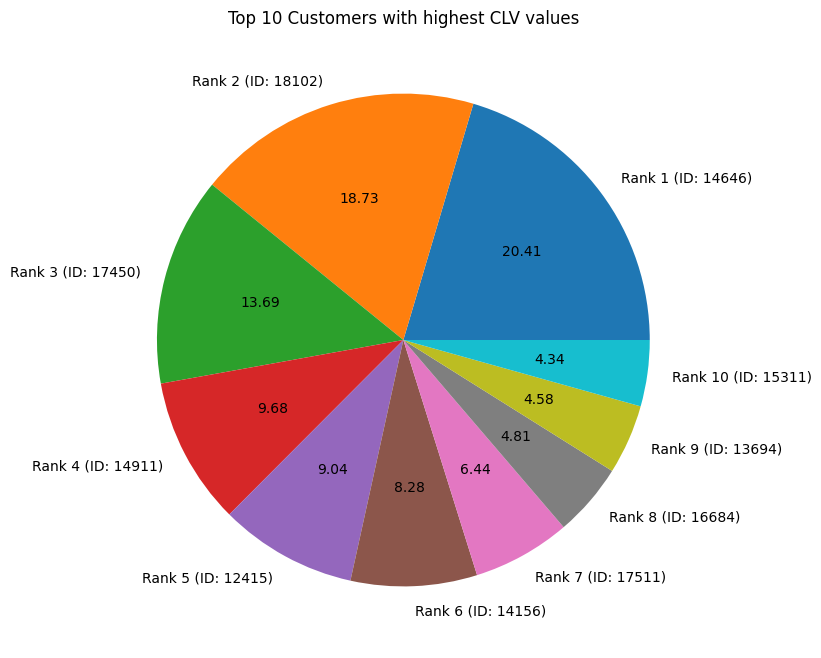

In [60]:
# Visualizing customers with top 10 CLV values
plt.figure(figsize=(10,8))
# Create a list of the cleaned Customer IDs (e.g., 14646 instead of 14646.0)
cleaned_ids = [str(int(id)) for id in top_10_clv_customers.index]

# The rank is based on the current order of the Top_10_customers object
ranked_labels = [f"Rank {i+1} (ID: {cid})" for i, cid in enumerate(cleaned_ids)] #Create a list of rank labels (e.g., 'Rank 1 (ID: 14646)')
plt.title("Top 10 Customers with highest CLV values")
plt.pie(top_10_clv_customers.values,labels=ranked_labels, autopct="%.2f")
plt.show()

In [51]:
# Calculate average order value(AOV) of whole time period
Number_of_orders=data['InvoiceNo'].nunique()
AOV=total_revenue/Number_of_orders
print(f"Average order value is {AOV:.2f}")

Average order value is 439.29


In [52]:
# Average Order Value (AOV) change month-over-month
month_wise_revenue=data.groupby(months)['Total Price'].sum().reset_index()
month_wise_orders=data.groupby(months)['InvoiceNo'].nunique().reset_index()
month_wise_orders['Total Revenue']=month_wise_revenue['Total Price']
month_wise_orders['AOV']=month_wise_orders['Total Revenue']/month_wise_orders['InvoiceNo']
month_wise_orders.columns=[['Month','Total Orders','Total Revenue','Total AOV']]
month_wise_orders

,Month,Total Orders,Total Revenue,Total AOV
0,1,1236,475074.380,384.364385
1,2,1202,436546.150,363.183153
2,3,1619,579964.610,358.223972
3,4,1384,426047.851,307.838043
4,5,1849,648251.080,350.595500
5,6,1707,608013.160,356.188143
6,7,1593,574238.481,360.476134
7,8,1544,616368.000,399.202073
8,9,2078,931440.372,448.238870
9,10,2263,974603.590,430.668842


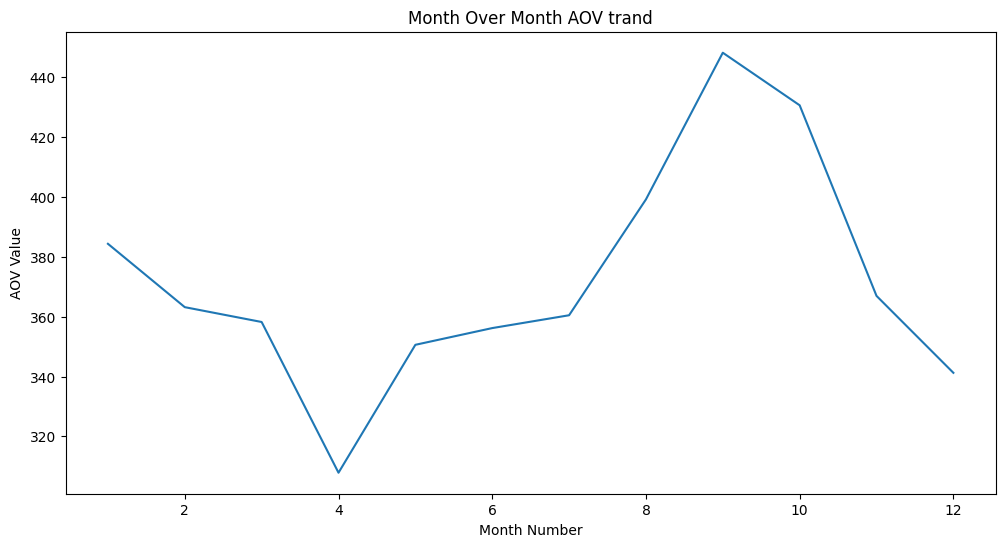

In [53]:
# Visualizing month-over-month AOV trend
plt.figure(figsize=(12,6))
plt.title("Month Over Month AOV trand")
plt.xlabel("Month Number")
plt.ylabel("AOV Value")
plt.plot(month_wise_orders['Month'],month_wise_orders['Total AOV'])
plt.show()

# All months AOV is less than Average AOV(439.29) except September(448.23)